In [1]:
import numpy as np
#import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from data_preprocessing import *

from keras.models import load_model

%matplotlib inline

/Users/ericd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Get the training data and test data

In [7]:
# last two para: training ratio, group
X_train, Y_train, X_test, Y_test = process_data('239Final_Data', 'Cropped', 0.8, 7)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 168
number of test examples = 42
X_train shape: (168, 100, 100, 16)
Y_train shape: (168, 4)
X_test shape: (42, 100, 100, 16)
Y_test shape: (42, 4)


# Trianing part

In [8]:
def AOP_Models(input_shape):
    """
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    X_input = Input(shape=input_shape)
    X = ZeroPadding2D(padding=(1, 1))(X_input)
    X = Conv2D(32, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    X = ZeroPadding2D(padding=(1, 1))(X)
    X = Conv2D(64, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    X = ZeroPadding2D(padding=(1, 1))(X)
    X = Conv2D(128, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    X = Dropout(0.25)(X)
    
    # FC
    X = Flatten()(X)
    X = Dropout(0.25)(X)
    Y = Dense(4, activation='linear')(X)
    
    model = Model(inputs = X_input, outputs = Y, name='AOP_Models')
    
    return model

In [9]:
# build model
AOP_Models = AOP_Models((X_train.shape[1], X_train.shape[2], X_train.shape[3]))
# set learning para
AOP_Models.compile(optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), \
                   loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
# train
AOP_train = AOP_Models.fit(x=X_train, y=Y_train, batch_size=32, epochs=20, shuffle = True)

# detailed para

In [10]:
AOP_Models.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 16)      0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 102, 102, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
activation_4 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 52, 52, 32)        0         
__________

# plot loss

In [ ]:
loss = AOP_train.history['loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b-')

plt.show()

# test with exist model

In [13]:
# read model
AOP_Models = load_model('Aop_model.h5')
# predict
predicted = AOP_Models.predict(X_test)

In [24]:
# see the difference between predict and truth
for i in range(len(predicted)):
    p = predicted[i]
    t = Y_test[i]
    print(p, t)

[-42.603226  -9.587901  40.74276  -41.833324] [-25.08  -3.3   23.58 -24.42]
[-39.67028   -9.222541  37.220108 -38.334404] [-25.08  -3.3   23.58 -24.42]
[-38.751938   -7.1036997  38.83047   -39.473476 ] [-25.08  -3.3   23.58 -24.42]
[-39.32129   -8.28989   37.79162  -38.418926] [-25.08  -3.3   23.58 -24.42]
[-36.127567  -8.778581  33.73651  -35.178257] [-25.08  -3.3   23.58 -24.42]
[-31.803783  -6.46568   31.473047 -32.038956] [-25.08  -3.3   23.58 -24.42]
[ 54.71735   12.744027 -43.795517  47.97171 ] [ 74.53  10.11 -69.68  72.34]
[ 55.30235   15.090723 -42.304348  46.8069  ] [ 74.53  10.11 -69.68  72.34]
[ 56.348026  14.359427 -44.435333  48.684483] [ 74.53  10.11 -69.68  72.34]
[ 46.912373  11.169034 -37.2084    40.95695 ] [ 74.53  10.11 -69.68  72.34]
[ 52.286793  11.238951 -42.581436  46.368767] [ 74.53  10.11 -69.68  72.34]
[ 52.61417   11.820437 -42.91353   47.15606 ] [ 74.53  10.11 -69.68  72.34]
[-91.05368  -25.771152  96.05138  -94.78714 ] [-93.41 -30.85  90.95 -92.3 ]
[-94.074

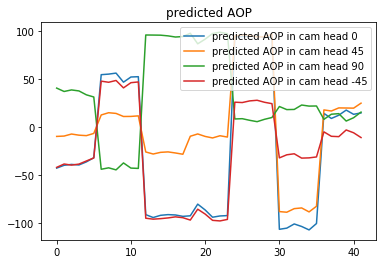

In [36]:
degree = [0, 45, 90, -45]
new_predicts = zip(*predicted)
i = 0
for new_predict in new_predicts:
    plt.plot(new_predict, label = 'predicted AOP in cam head %d'%degree[i])
    i += 1
    
plt.legend()
plt.title('predicted AOP')
plt.show()

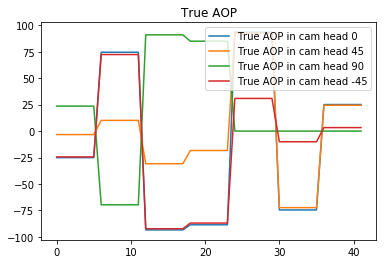

In [37]:
degree = [0, 45, 90, -45]
new_Y_tests = zip(*Y_test)
i = 0
for new_Y_test in new_Y_tests:
    plt.plot(new_Y_test, label = 'True AOP in cam head %d'%degree[i])
    i += 1
    
plt.legend()
plt.title('True AOP')
plt.show()

In [20]:
#generate ground truth
from generate_scm_table import *
# sun_az, sun_zen_low, sun_zen_high, sun_zen_inter, cam_head_low, cam_head_high, cam_head_inter
truth_map, aop_all = aop_2_truthMap(90, 5, 65, 5, -45, 90, 45)

# predict
for i in range(len(predicted)):
    p = predicted[i].reshape(1, 4)
    diff = np.linalg.norm(aop_all - p, axis = 1)
    small_idx = np.argmin(diff)
    print(truth_map[small_idx])

[35, -90]
[35, -90]
[35, -90]
[35, -90]
[35, -90]
[35, -90]
[45, -90]
[45, -90]
[45, -90]
[45, -90]
[45, -90]
[45, -90]
[30, -90]
[30, -90]
[30, -90]
[30, -90]
[30, -90]
[30, -90]
[5, -90]
[5, -90]
[5, -90]
[5, -90]
[5, -90]
[5, -90]
[30, 90]
[30, 90]
[30, 90]
[30, 90]
[30, 90]
[30, 90]
[20, 90]
[20, 90]
[20, 90]
[20, 90]
[20, 90]
[20, 90]
[50, 90]
[25, 90]
[50, 90]
[50, 90]
[50, 90]
[50, 90]


# Saving model

In [ ]:
AOP_Models.save('Aop_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model
 
# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')